In [1]:
import sys,os,math,string,time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from pyzillow.pyzillow import ZillowWrapper, GetDeepSearchResults
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import ensemble, tree, linear_model
import seaborn as sns
import scipy.stats as st
import missingno as msno
import pickle
pd.options.display.max_rows = 200

%matplotlib inline 

In [2]:
df = pd.read_csv("downsized_6.csv")
df = df.drop(columns=["Unnamed: 0"],axis=1)

In [3]:
df.columns

Index(['key', 'PID', 'ST_NUM', 'ST_NAME', 'ST_NAME_SUF', 'ZIPCODE', 'PTYPE',
       'LU', 'OWN_OCC', 'AV_BLDG', 'AV_TOTAL', 'GROSS_TAX', 'LAND_SF',
       'YR_BUILT', 'YR_REMOD', 'GROSS_AREA', 'LIVING_AREA', 'NUM_FLOORS',
       'R_BLDG_STYL', 'R_ROOF_TYP', 'R_EXT_FIN', 'R_TOTAL_RMS', 'R_BDRMS',
       'R_FULL_BTH', 'R_HALF_BTH', 'R_BTH_STYLE', 'R_KITCH', 'R_KITCH_STYLE',
       'R_HEAT_TYP', 'R_AC', 'R_FPLACE', 'R_EXT_CND', 'R_OVRALL_CND',
       'R_INT_CND', 'R_INT_FIN', 'R_VIEW', 'FULLADD', 'R_TOTAL_BTH',
       'MARKET_VALUE', 'DIFF_MV', 'DIFF_TAX', 'Lattitude', 'Longitude',
       'LatLon', 'DIS0', 'DIS1', 'DIS2', 'DIS3', 'DIS4', 'DIS5'],
      dtype='object')

In [4]:
df = df.drop(columns=["DIFF_TAX","DIFF_MV","Lattitude","Longitude","LatLon"],axis=1)

In [5]:
df = df[df["DIS0"]<100]
df["DIS0"] = np.log(df["DIS0"])
df["DIS1"] = np.log(df["DIS1"])
df["DIS2"] = np.log(df["DIS2"])
df["DIS3"] = np.log(df["DIS3"])
df["DIS4"] = np.log(df["DIS4"])

df["MARKET_VALUE"] = np.log(df["MARKET_VALUE"])
df["GROSS_AREA"] = np.log(df["GROSS_AREA"])
df["LIVING_AREA"] = np.log(df["LIVING_AREA"])
df["YR_REMOD"] = df["YR_REMOD"].fillna(value=0.0); 
df['OWN_OCC'] = df['OWN_OCC'].map({'Y': 1, 'N': 0})
df["key"] = pd.to_numeric(df["key"], errors='ignore')
df = df.dropna(); 
print(len(df))

28408


In [6]:
for feat in df.columns: 
    temper = df[df[feat].isna()]
    if(len(temper)>0): 
        print(feat, len(temper))

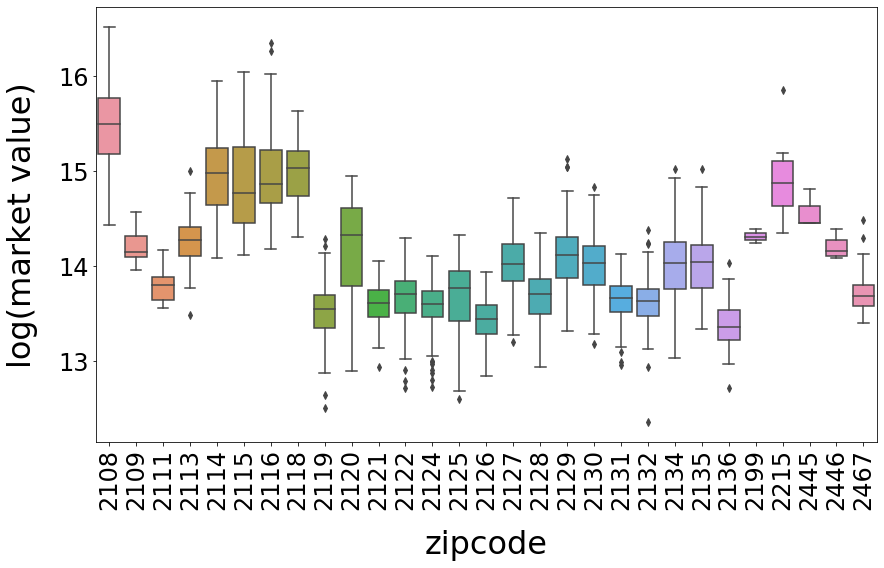

In [7]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="ZIPCODE", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)

plt.xticks(size=24)
plt.yticks(size=24)
plt.xlabel("zipcode",size=32,labelpad=20)
plt.ylabel("log(market value)",size=32,labelpad=20)

#plt.xlim(left=-0.5e6,right=0.5e6)
plt.xticks(rotation=90)
plt.savefig("Zipcode_EDA.png",bbox_inches="tight",dpi=300)
plt.show()

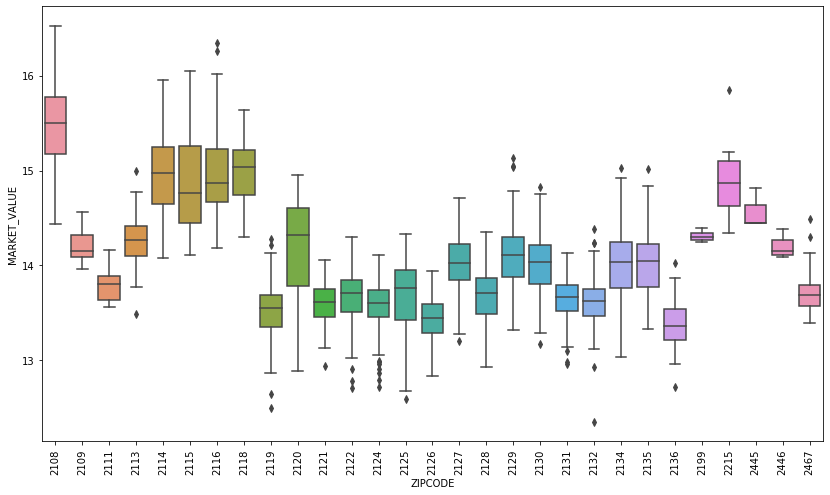

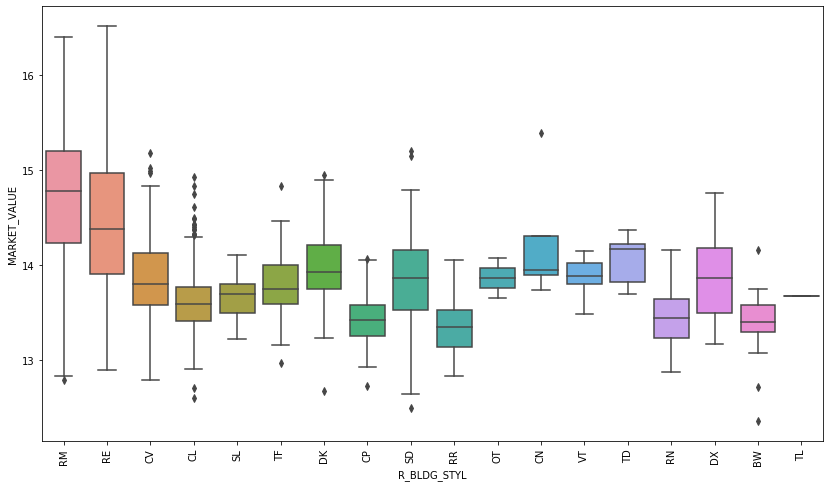

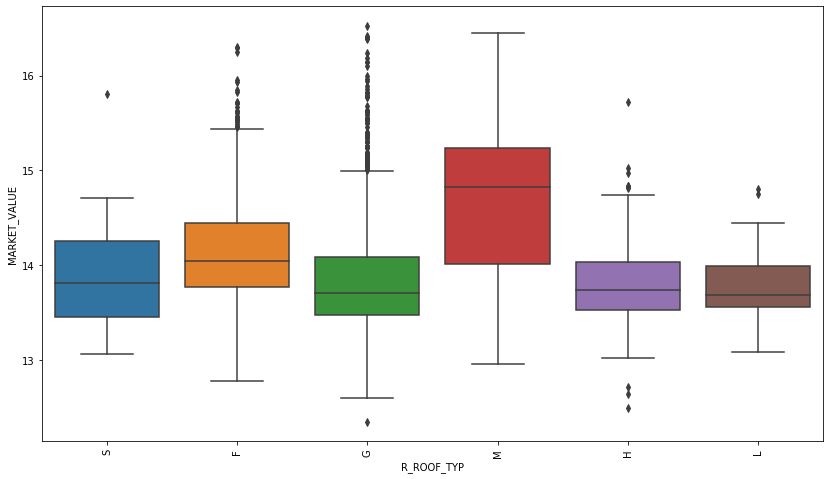

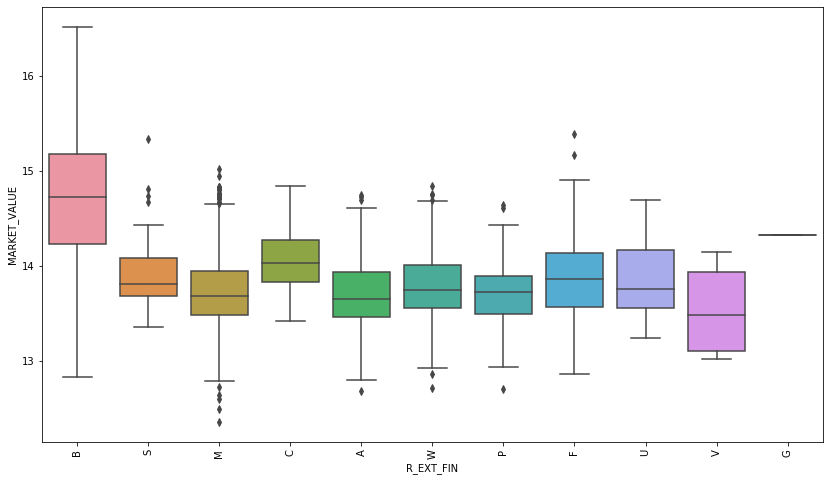

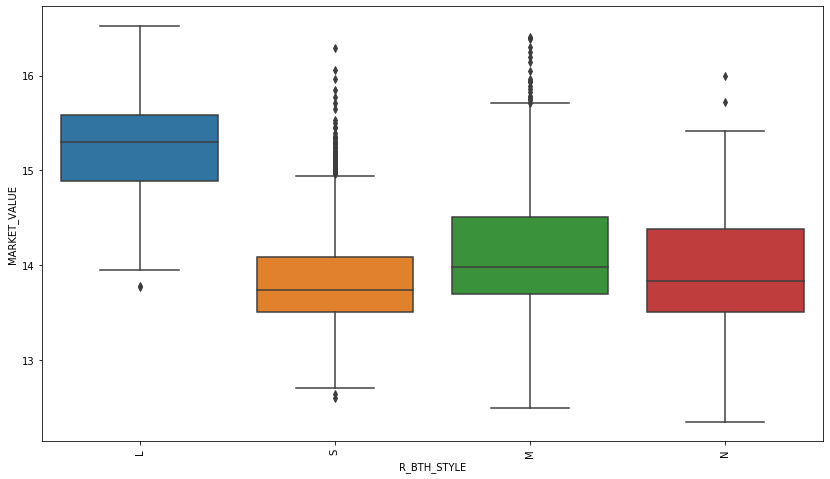

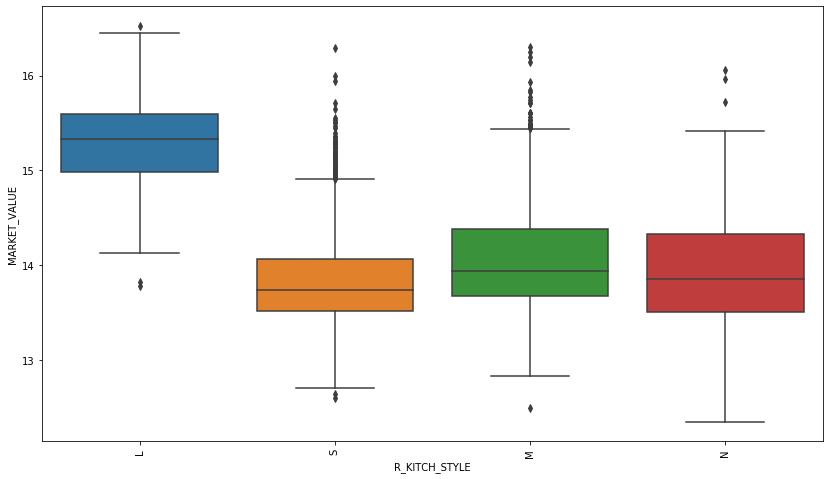

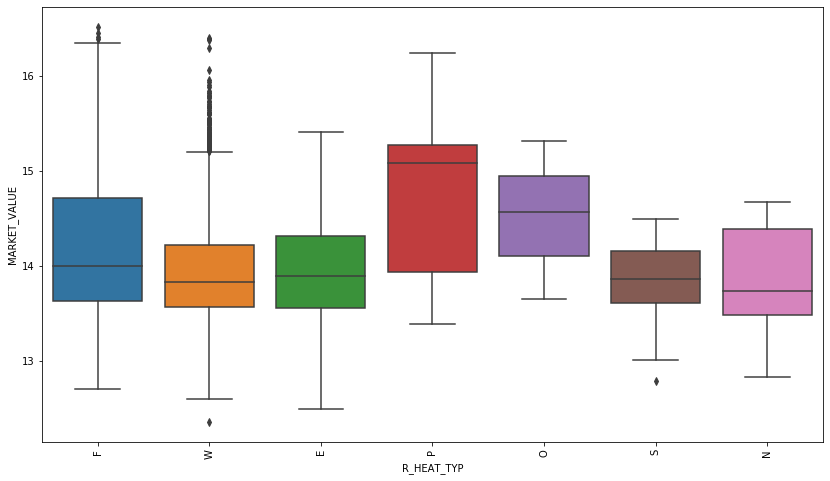

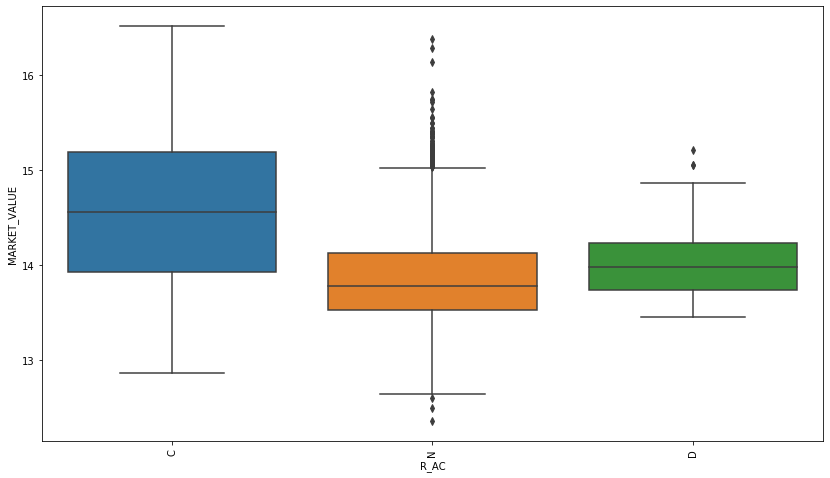

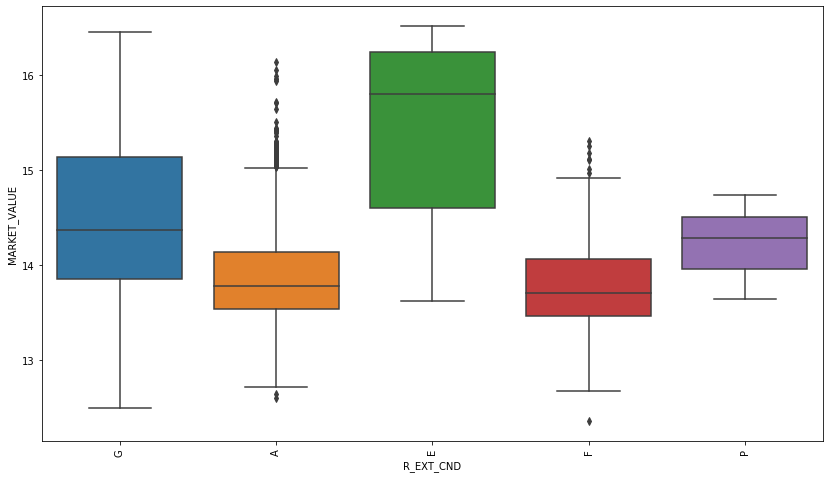

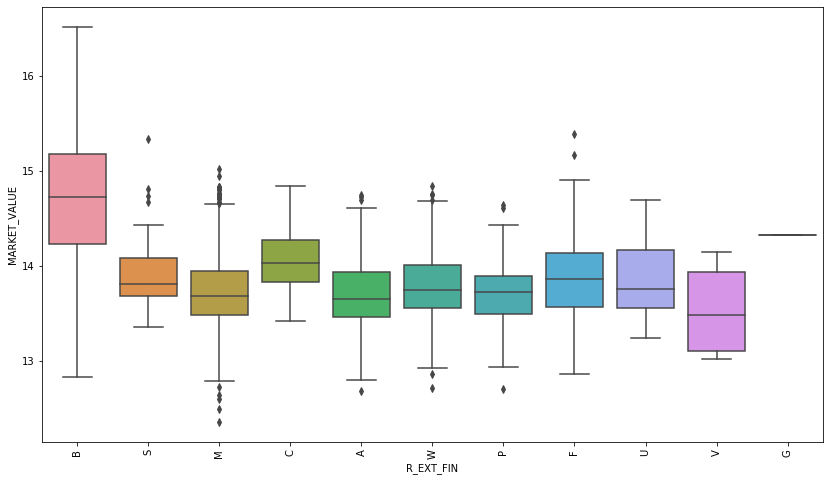

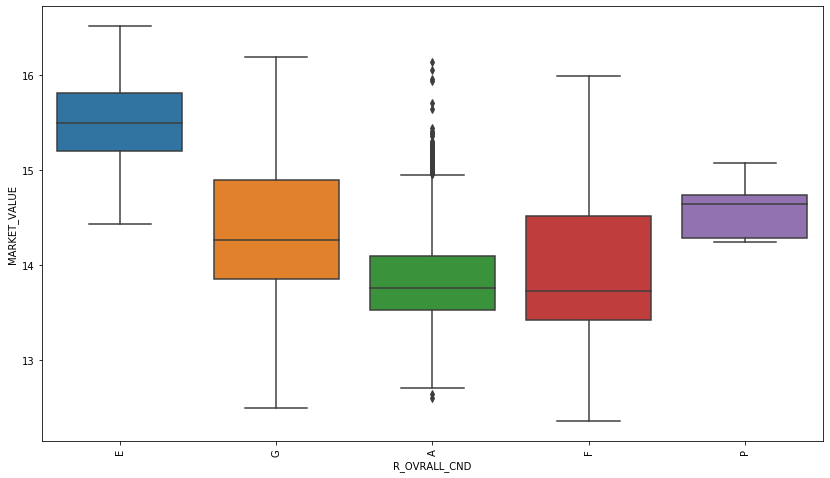

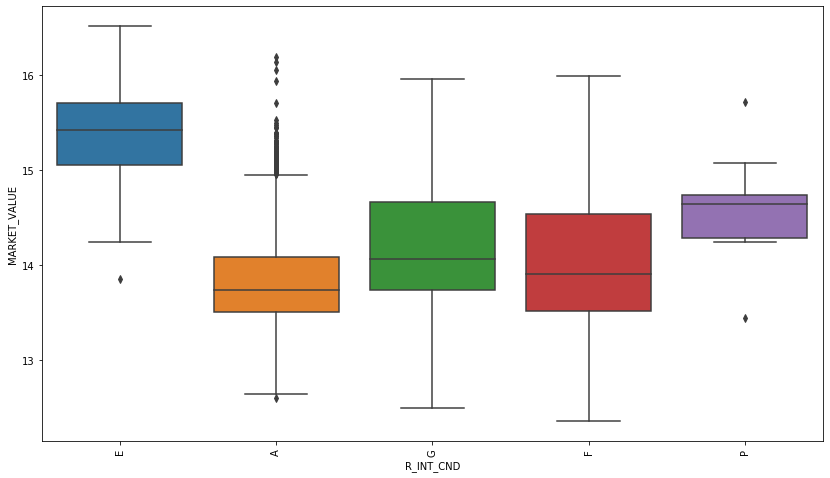

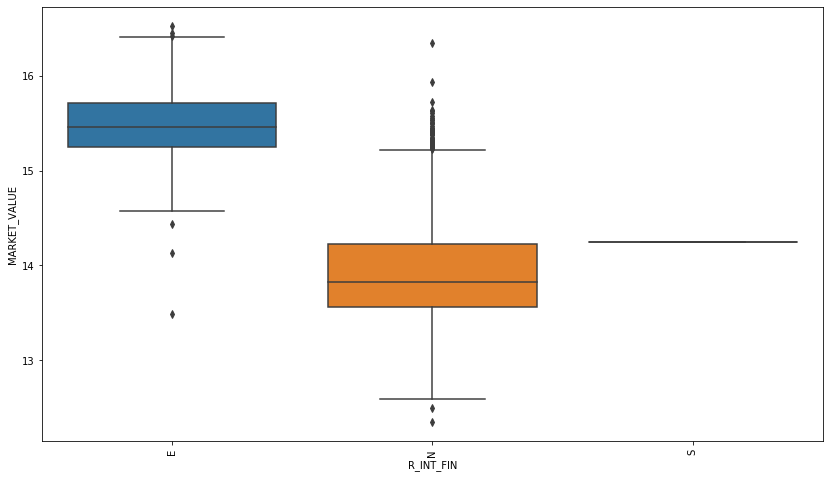

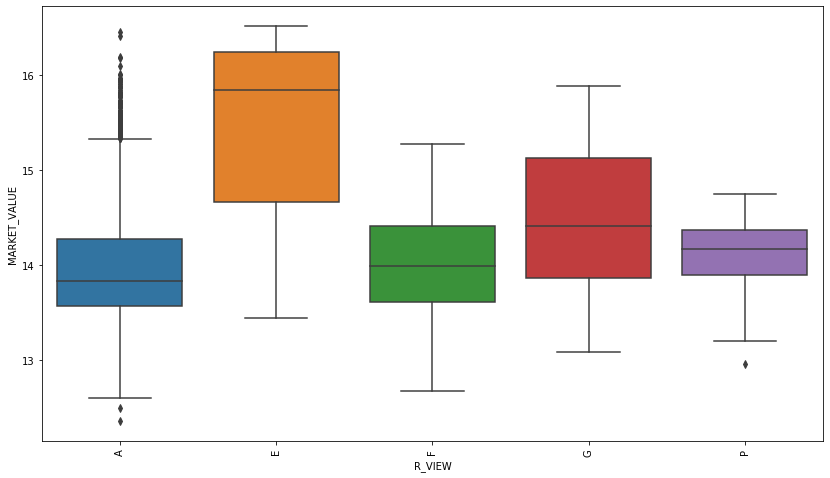

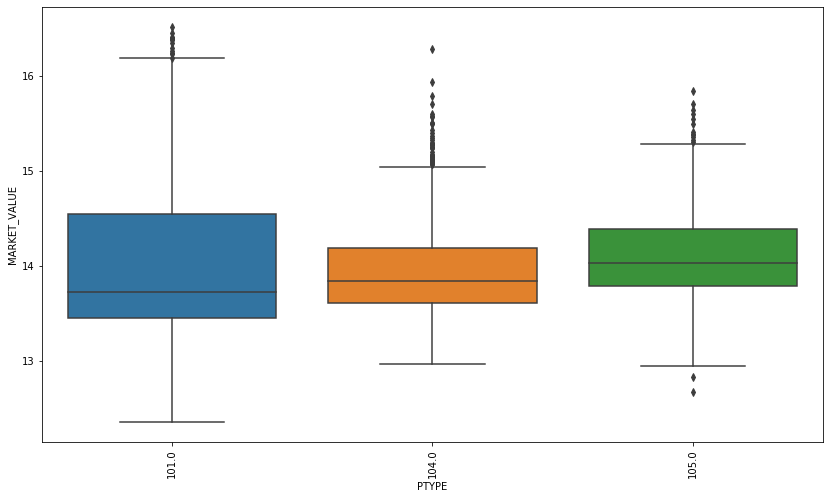

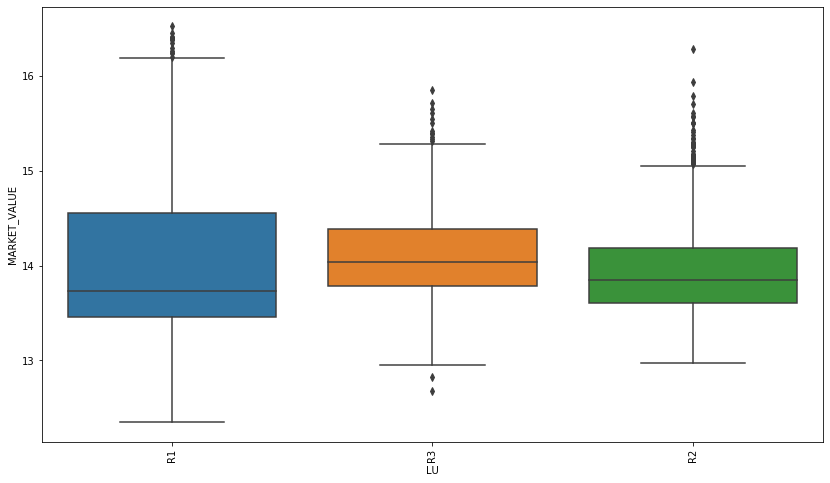

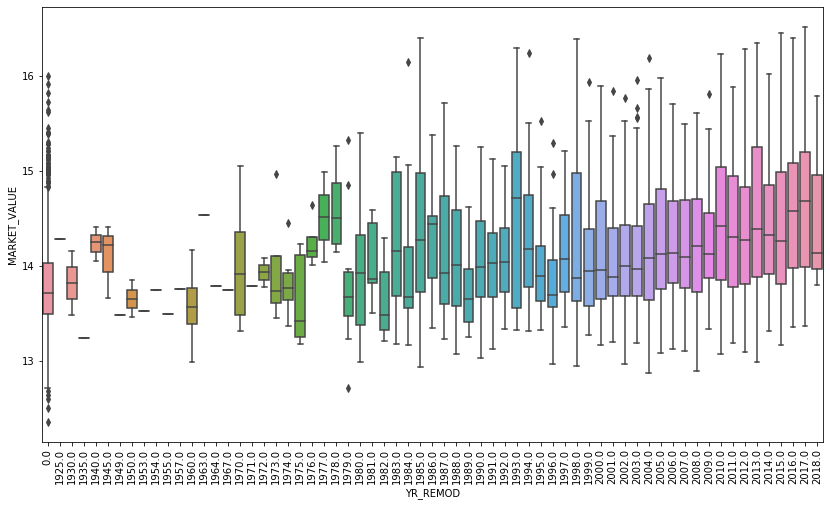

In [8]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="ZIPCODE", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_BLDG_STYL", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_ROOF_TYP", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_EXT_FIN", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_BTH_STYLE", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_KITCH_STYLE", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_HEAT_TYP", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_AC", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_EXT_CND", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_EXT_FIN", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_OVRALL_CND", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_INT_CND", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_INT_FIN", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_VIEW", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="PTYPE", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="LU", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="YR_REMOD", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()

# --- additional feature engineering! ---

## (1) Avg zipcode Market-value per year. 


In [9]:
Zips = pd.unique(df["ZIPCODE"])
Years = pd.unique(df["key"])
len(df)

df["ZIP_MV"] = 0
df2 = pd.DataFrame(columns=df.columns)
for zv in Zips: 
    temper2 = df[df["ZIPCODE"]==zv]; 
    temper2["ZIP_MV"] = temper2["MARKET_VALUE"].mean()
    df2 = df2.append(temper2)

print(len(df2))

/home/npatel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


28408


In [10]:
df2.columns

Index(['key', 'PID', 'ST_NUM', 'ST_NAME', 'ST_NAME_SUF', 'ZIPCODE', 'PTYPE',
       'LU', 'OWN_OCC', 'AV_BLDG', 'AV_TOTAL', 'GROSS_TAX', 'LAND_SF',
       'YR_BUILT', 'YR_REMOD', 'GROSS_AREA', 'LIVING_AREA', 'NUM_FLOORS',
       'R_BLDG_STYL', 'R_ROOF_TYP', 'R_EXT_FIN', 'R_TOTAL_RMS', 'R_BDRMS',
       'R_FULL_BTH', 'R_HALF_BTH', 'R_BTH_STYLE', 'R_KITCH', 'R_KITCH_STYLE',
       'R_HEAT_TYP', 'R_AC', 'R_FPLACE', 'R_EXT_CND', 'R_OVRALL_CND',
       'R_INT_CND', 'R_INT_FIN', 'R_VIEW', 'FULLADD', 'R_TOTAL_BTH',
       'MARKET_VALUE', 'DIS0', 'DIS1', 'DIS2', 'DIS3', 'DIS4', 'DIS5',
       'ZIP_MV'],
      dtype='object')

In [11]:
#df2.to_csv("downsized_7.csv",index=False)

In [12]:
myfeat = ['key', 'PTYPE',
       'LU', 'OWN_OCC', 'LAND_SF', 'YR_BUILT', 'YR_REMOD', 'GROSS_AREA', 'LIVING_AREA', 'NUM_FLOORS',
       'R_BLDG_STYL', 'R_ROOF_TYP', 'R_EXT_FIN', 'R_TOTAL_RMS', 'R_BDRMS',
       'R_FULL_BTH', 'R_HALF_BTH', 'R_BTH_STYLE', 'R_KITCH', 'R_KITCH_STYLE',
       'R_HEAT_TYP', 'R_AC', 'R_FPLACE', 'R_EXT_CND', 'R_OVRALL_CND',
       'R_INT_CND', 'R_INT_FIN', 'R_VIEW', 'R_TOTAL_BTH','MARKET_VALUE', "ZIP_MV",
        'DIS0', 'DIS1', 'DIS2', 'DIS3', 'DIS4', 'DIS5']
data = df2[myfeat]

In [13]:
data["key"] = pd.to_numeric(data["key"], errors='ignore')

/home/npatel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
data = pd.get_dummies(data)

In [15]:
all_features = data.columns
index = np.argwhere(all_features=="MARKET_VALUE")
all_features = np.delete(all_features, index)
target_feature = "MARKET_VALUE"

In [16]:
data.columns

Index(['key', 'PTYPE', 'LAND_SF', 'YR_BUILT', 'YR_REMOD', 'GROSS_AREA',
       'LIVING_AREA', 'NUM_FLOORS', 'R_TOTAL_RMS', 'R_BDRMS',
       ...
       'R_INT_CND_G', 'R_INT_CND_P', 'R_INT_FIN_E', 'R_INT_FIN_N',
       'R_INT_FIN_S', 'R_VIEW_A', 'R_VIEW_E', 'R_VIEW_F', 'R_VIEW_G',
       'R_VIEW_P'],
      dtype='object', length=106)

In [17]:
for feat in data.columns: 
    temper = data[data[feat].isna()]
    if(len(temper)>0): 
        print(feat, len(temper))

# Data Setup for Modeling

In [18]:
test19 = data[data["key"]==2019]
train19 = data[data["key"]!=2019]

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(train19[all_features], train19[target_feature], test_size=0.2, random_state=1)

In [20]:
X_test = X_test.append(test19[all_features]);
Y_test = Y_test.append(test19[target_feature]); 

In [21]:
X_train.columns

Index(['key', 'PTYPE', 'LAND_SF', 'YR_BUILT', 'YR_REMOD', 'GROSS_AREA',
       'LIVING_AREA', 'NUM_FLOORS', 'R_TOTAL_RMS', 'R_BDRMS',
       ...
       'R_INT_CND_G', 'R_INT_CND_P', 'R_INT_FIN_E', 'R_INT_FIN_N',
       'R_INT_FIN_S', 'R_VIEW_A', 'R_VIEW_E', 'R_VIEW_F', 'R_VIEW_G',
       'R_VIEW_P'],
      dtype='object', length=105)

In [22]:
X_train

,key,PTYPE,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS,R_TOTAL_RMS,R_BDRMS,...,R_INT_CND_G,R_INT_CND_P,R_INT_FIN_E,R_INT_FIN_N,R_INT_FIN_S,R_VIEW_A,R_VIEW_E,R_VIEW_F,R_VIEW_G,R_VIEW_P
27591,2013,101.0,7143.0,1938.0,0.0,8.531688,7.817625,2.0,10.0,4.0,...,1,0,0,1,0,1,0,0,0,0
2947,2016,101.0,1558.0,2006.0,0.0,8.114923,7.730175,3.0,8.0,4.0,...,0,0,0,1,0,1,0,0,0,0
4907,2013,101.0,620.0,1827.0,1985.0,7.718685,7.538495,3.5,10.0,4.0,...,1,0,0,1,0,1,0,0,0,0
27488,2012,101.0,6881.0,1938.0,0.0,7.885329,7.502738,2.0,6.0,3.0,...,0,0,0,1,0,1,0,0,0,0
27314,2010,101.0,6890.0,1955.0,0.0,7.874359,7.123673,1.0,6.0,2.0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12682,2017,101.0,4888.0,1875.0,2006.0,8.015658,7.391415,2.0,8.0,3.0,...,1,0,0,1,0,1,0,0,0,0
20570,2012,105.0,6010.0,1905.0,0.0,8.869679,8.516193,3.0,18.0,6.0,...,0,0,0,1,0,1,0,0,0,0
6014,2018,104.0,1632.0,1860.0,0.0,8.431199,8.198364,3.0,13.0,4.0,...,0,0,0,1,0,1,0,0,0,0
14169,2018,101.0,3600.0,1900.0,2015.0,8.291547,7.736307,2.0,9.0,4.0,...,1,0,0,1,0,1,0,0,0,0


# ElasticNet 

In [49]:
from sklearn.linear_model import ElasticNetCV

In [50]:
ElasticNetCVModel2 = ElasticNetCV(l1_ratio=[1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1], 
                                  eps=0.0001, n_alphas=50, normalize=True, random_state=1,
                                  verbose=True, max_iter=1000)

In [51]:
ElasticNetCVModel2.fit(X_train,Y_train)

/home/npatel/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.0001,
             fit_intercept=True,
             l1_ratio=[1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
             max_iter=1000, n_alphas=50, n_jobs=None, normalize=True,
             positive=False, precompute='auto', random_state=1,
             selection='cyclic', tol=0.0001, verbose=True)

In [52]:
ElasticNetCVModel2.coef_

array([ 3.43650553e-02, -6.21309756e-03,  1.47548579e-05, -3.01201267e-04,
        1.19798409e-05,  1.54395432e-01,  2.94363491e-01,  3.31626207e-02,
        2.34956812e-03, -4.27721414e-03,  2.28905971e-02,  2.01816511e-02,
        1.05752916e-02,  1.50607199e-02,  3.04327799e-02,  7.70414189e-01,
       -1.04711390e-02, -3.21946114e-02,  3.74387995e-02, -0.00000000e+00,
       -1.15896766e-01,  9.32468131e-02,  1.80607174e-02, -0.00000000e+00,
       -2.58872638e-02, -5.93502209e-03,  0.00000000e+00, -4.95363798e-02,
       -0.00000000e+00,  7.57093123e-02,  1.99776174e-02, -2.26609629e-02,
       -1.76577127e-02,  4.23686025e-03,  1.11450557e-01,  4.78516082e-02,
        3.18164898e-02,  3.57473460e-02, -8.26497640e-03,  2.08960077e-02,
        5.57341088e-02,  1.00534791e-01, -2.47752675e-02, -5.59235633e-03,
        1.57915135e-02, -6.97846946e-03,  0.00000000e+00,  1.36993475e-02,
       -7.33094844e-03,  4.30786310e-02, -3.04962092e-02, -7.60950677e-02,
        6.30220119e-04,  

In [53]:
pd.options.display.max_rows = 200

In [54]:
coef_val = pd.Series(ElasticNetCVModel2.coef_,all_features)
print(coef_val.sort_values(ascending=False))
#for index, feat in enumerate(X_train.columns): 
#    print(index, feat, ElasticNetCVModel2.coef_[index])

ZIP_MV             0.770414
LIVING_AREA        0.294363
R_VIEW_E           0.226652
R_EXT_FIN_G        0.199178
GROSS_AREA         0.154395
R_BLDG_STYL_OT     0.111451
R_BLDG_STYL_TD     0.100535
R_VIEW_G           0.097128
R_INT_FIN_E        0.096280
DIS5               0.093247
R_INT_CND_E        0.090322
R_BLDG_STYL_CN     0.075709
R_BLDG_STYL_SL     0.055734
R_EXT_FIN_C        0.052737
R_BLDG_STYL_RE     0.047852
R_ROOF_TYP_M       0.043079
R_HEAT_TYP_P       0.040918
DIS2               0.037439
R_BLDG_STYL_RN     0.035747
key                0.034365
R_EXT_FIN_S        0.034154
NUM_FLOORS         0.033163
R_BLDG_STYL_RM     0.031816
R_TOTAL_BTH        0.030433
R_EXT_FIN_W        0.025627
R_KITCH_STYLE_M    0.023838
R_EXT_FIN_V        0.023403
R_FULL_BTH         0.022891
R_INT_CND_G        0.021109
R_BLDG_STYL_SD     0.020896
R_HALF_BTH         0.020182
R_BLDG_STYL_CP     0.019978
R_EXT_CND_G        0.019481
R_KITCH_STYLE_L    0.019051
LU_R1              0.018061
R_HEAT_TYP_S       0

In [55]:
print("train R^2 = ", ElasticNetCVModel2.score(X_train,Y_train))
print("test R^2 = ", ElasticNetCVModel2.score(X_test,Y_test))
print("L1_ratio = ", ElasticNetCVModel2.l1_ratio_)
stdev = np.sqrt(sum((ElasticNetCVModel2.predict(X_train) - Y_train)**2) / (len(Y_train) - 2))
print(stdev, np.exp(stdev))
#print("mse = ", ElasticNetCVModel2.mse_path_)

train R^2 =  0.925771384054627
test R^2 =  0.9199535558406577
L1_ratio =  1.0
0.17224669714692215 1.1879708660905235


plt.scatter(X_test["LIVING_AREA"],Y_test)
plt.scatter(X_test["LIVING_AREA"],ElasticNetCVModel2.predict(X_test[all_features]))

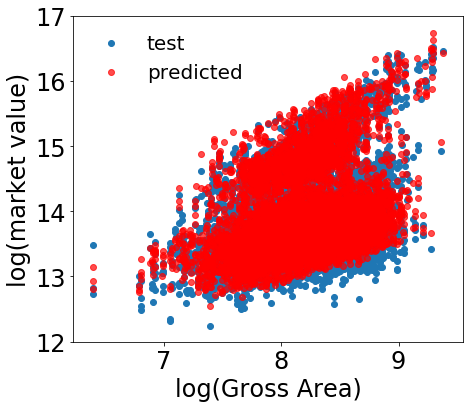

In [56]:
fig = plt.figure(figsize=(7,6))
plt.scatter(X_test["GROSS_AREA"],Y_test,label="test",alpha=1.0)
plt.scatter(X_test["GROSS_AREA"],ElasticNetCVModel2.predict(X_test[all_features]),color="red",label="predicted",alpha=0.7)
plt.xticks([7.0,8.0,9.0],size=24)
plt.yticks(size=24)
plt.xlabel("log(Gross Area)",size=24)
plt.ylabel("log(market value)",size=24)
plt.legend(prop={'size': 20},frameon=False)
plt.savefig("Model2_AreaVsMV.png",bbox_inches="tight",dpi=300)

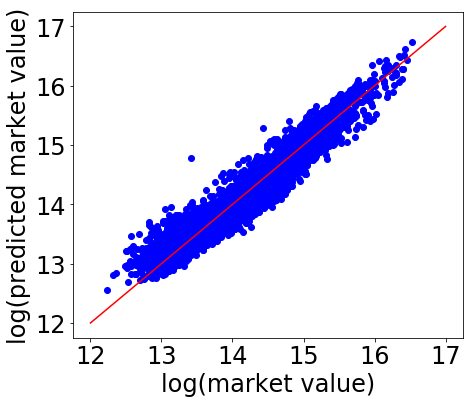

In [57]:
fig = plt.figure(figsize=(7,6))
plt.scatter(Y_test,ElasticNetCVModel2.predict(X_test[all_features]),color="blue")
plt.plot([12,17],[12,17],"-",color="red")
plt.xticks([12,13,14,15,16,17],size=24)
plt.yticks([12,13,14,15,16,17],size=24)
plt.ylabel("log(predicted market value)",size=24)
plt.xlabel("log(market value)",size=24)
#plt.legend(prop={'size': 20},frameon=False)
plt.savefig("test_predictMV.png",bbox_inches="tight",dpi=300)

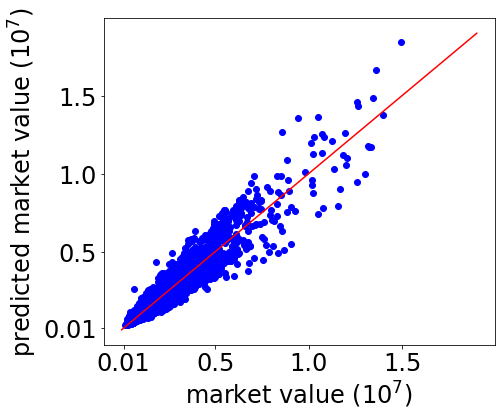

In [58]:
fig = plt.figure(figsize=(7,6))
plt.scatter(np.exp(Y_test),np.exp(ElasticNetCVModel2.predict(X_test[all_features])),color="blue")
plt.plot([0,1.9e7],[0,1.9e7],"-",color="red")
plt.xticks([0.01e7,0.50e7,1.00e7,1.5e7],["0.01","0.5","1.0","1.5"],size=24)
plt.yticks([0.01e7,0.50e7,1.00e7,1.5e7],["0.01","0.5","1.0","1.5"],size=24)
#plt.plot([12,17],[12,17],"-",color="red")
plt.ylabel("predicted market value $(10^7)$",size=24)
plt.xlabel("market value $(10^7)$",size=24)
#plt.legend(prop={'size': 20},frameon=False)
plt.savefig("test_predictMV_NOLOG.png",bbox_inches="tight",dpi=300)

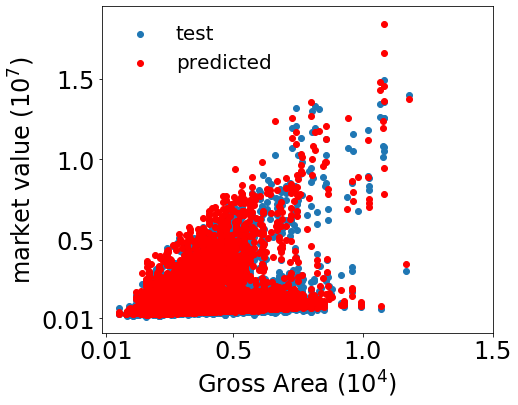

In [59]:
fig = plt.figure(figsize=(7,6))
plt.scatter(np.exp(X_test["GROSS_AREA"].values),np.exp(Y_test.values),label="test")
plt.scatter(np.exp(X_test["GROSS_AREA"].values),np.exp(ElasticNetCVModel2.predict(X_test[all_features])),color="red",label="predicted")
plt.xticks([0.01e4,0.50e4,1.00e4,1.5e4],["0.01","0.5","1.0","1.5"],size=24)
plt.yticks([0.01e7,0.50e7,1.00e7,1.5e7],["0.01","0.5","1.0","1.5"],size=24)

plt.xlabel("Gross Area $(10^4)$",size=24)
plt.ylabel("market value $(10^7)$",size=24)
plt.legend(prop={'size': 20},frameon=False)
plt.savefig("Model2_AreaVsMV_UnLog.png",bbox_inches="tight",dpi=300)

# Find out-liers and check renovation potential 

In [62]:
ndata = data.copy(deep=True); 
ndata.columns

Index(['key', 'PTYPE', 'LAND_SF', 'YR_BUILT', 'YR_REMOD', 'GROSS_AREA',
       'LIVING_AREA', 'NUM_FLOORS', 'R_TOTAL_RMS', 'R_BDRMS',
       ...
       'R_INT_CND_G', 'R_INT_CND_P', 'R_INT_FIN_E', 'R_INT_FIN_N',
       'R_INT_FIN_S', 'R_VIEW_A', 'R_VIEW_E', 'R_VIEW_F', 'R_VIEW_G',
       'R_VIEW_P'],
      dtype='object', length=106)

In [63]:
ndata["Residual"] = np.exp(ndata["MARKET_VALUE"]) - np.exp(ElasticNetCVModel2.predict(ndata[all_features]))

In [64]:
RSS = (ndata["Residual"]**2).sum()/len(ndata)

In [65]:
print("RSS =", np.sqrt(RSS), "Div = ")

RSS = 353015.6606519691 Div = 


In [66]:
print("mean of residual = ", ndata["Residual"].mean())
print("standard deviation = ", ndata["Residual"].values.std())

mean of residual =  18497.827407920984
standard deviation =  352530.68951047794


/home/npatel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


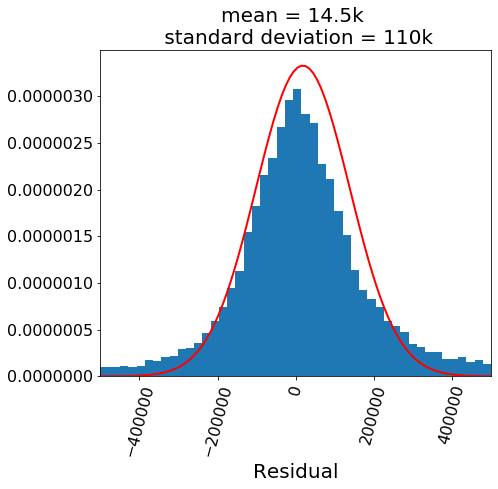

In [67]:


from scipy.stats import norm
xmin=-500000
xmax=500000
sigma_scale=0.34
mean=ndata["Residual"].mean()
std = ndata["Residual"].std()

fig = plt.figure(figsize=(7,6))
plt.hist(ndata["Residual"],bins=400, normed=True); 
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std*sigma_scale)
plt.plot(x, y,color="red",lw=2)

string = "mean = 14.5k \n standard deviation = 110k"; 
plt.title(string,size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Residual",size=20)
#plt.ylabel("zestimate - log(market value)",size=16)

plt.xlim(left=-0.5e6,right=0.5e6)
plt.xticks(rotation=75)
plt.savefig("Model2_Residual.png",bbox_inches="tight",dpi=300)
plt.show()

In [68]:
recommend = ndata[(ndata["Residual"]<-115000) & (ndata["Residual"]>-400000)]

In [69]:
recommend = recommend[(recommend["key"]==2019) & recommend["YR_REMOD"]!=0]

In [70]:
recommend

,key,PTYPE,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS,R_TOTAL_RMS,R_BDRMS,...,R_INT_CND_P,R_INT_FIN_E,R_INT_FIN_N,R_INT_FIN_S,R_VIEW_A,R_VIEW_E,R_VIEW_F,R_VIEW_G,R_VIEW_P,Residual
88,2019,101.0,1701.0,1890.0,2004.0,8.473868,8.219057,3.5,14.0,5.0,...,0,1,0,0,1,0,0,0,0,-132293.418222
480,2019,101.0,1750.0,1837.0,2016.0,8.459564,8.306472,3.5,12.0,4.0,...,0,1,0,0,1,0,0,0,0,-339234.710328
528,2019,101.0,1587.0,1890.0,2009.0,7.976595,7.976595,2.0,8.0,4.0,...,0,1,0,0,1,0,0,0,0,-250189.243764
912,2019,101.0,2000.0,1830.0,2015.0,8.942199,8.802973,4.5,13.0,3.0,...,0,1,0,0,1,0,0,0,0,-317983.704049
1920,2019,101.0,5000.0,1980.0,1999.0,8.325791,7.869402,2.0,10.0,4.0,...,0,0,1,0,0,1,0,0,0,-286288.001047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30451,2019,101.0,5607.0,1955.0,2008.0,7.863267,7.146772,1.0,6.0,3.0,...,0,0,1,0,0,0,0,1,0,-196523.717686
30459,2019,104.0,4312.0,1925.0,2010.0,8.335431,7.795647,2.0,10.0,4.0,...,0,0,1,0,1,0,0,0,0,-117609.587969
30539,2019,104.0,16025.0,1920.0,2011.0,8.941676,8.445697,2.5,10.0,6.0,...,0,0,1,0,1,0,0,0,0,-208869.243247
30635,2019,101.0,3078.0,1929.0,1984.0,7.865955,7.452982,2.0,8.0,3.0,...,0,0,1,0,1,0,0,0,0,-128227.191294


In [71]:
import scipy.stats as scs

In [72]:
y = ndata["Residual"]
a, b, loc, scale = scs.johnsonsu.fit(y) # fit the data and get distribution parameters back

# distribution mean and variance according to SciPy
dist_mean = scs.johnsonsu.mean(a, b, loc, scale)
dist_med  = scs.johnsonsu.median(a, b, loc, scale)
dist_var  = scs.johnsonsu.var(a, b, loc, scale)

In [73]:
print(dist_mean, dist_med, dist_var, np.sqrt(dist_var))

25569.644583589055 9589.481842176154 156716965027.58743 395874.93609420065


In [74]:
df3 = pd.read_csv("downsized_7.csv")
df['PTYPE'] = df['PTYPE'].astype('O') 

In [75]:
myfeat = ['key', 'PTYPE',
       'LU', 'OWN_OCC', 'LAND_SF', 'YR_BUILT', 'YR_REMOD', 'GROSS_AREA', 'LIVING_AREA', 'NUM_FLOORS',
       'R_BLDG_STYL', 'R_ROOF_TYP', 'R_EXT_FIN', 'R_TOTAL_RMS', 'R_BDRMS',
       'R_FULL_BTH', 'R_HALF_BTH', 'R_BTH_STYLE', 'R_KITCH', 'R_KITCH_STYLE',
       'R_HEAT_TYP', 'R_AC', 'R_FPLACE', 'R_EXT_CND', 'R_OVRALL_CND',
       'R_INT_CND', 'R_INT_FIN', 'R_VIEW', 'R_TOTAL_BTH','MARKET_VALUE', "ZIP_MV",
        'DIS0', 'DIS1', 'DIS2', 'DIS3', 'DIS4', 'DIS5']
df3.columns.to_series().groupby(df3.dtypes).groups

{dtype('int64'): Index(['key', 'PID', 'ZIPCODE', 'OWN_OCC', 'AV_BLDG', 'AV_TOTAL', 'GROSS_TAX'], dtype='object'),
 dtype('float64'): Index(['PTYPE', 'LAND_SF', 'YR_BUILT', 'YR_REMOD', 'GROSS_AREA', 'LIVING_AREA',
        'NUM_FLOORS', 'R_TOTAL_RMS', 'R_BDRMS', 'R_FULL_BTH', 'R_HALF_BTH',
        'R_KITCH', 'R_FPLACE', 'R_TOTAL_BTH', 'MARKET_VALUE', 'DIS0', 'DIS1',
        'DIS2', 'DIS3', 'DIS4', 'DIS5', 'ZIP_MV'],
       dtype='object'),
 dtype('O'): Index(['ST_NUM', 'ST_NAME', 'ST_NAME_SUF', 'LU', 'R_BLDG_STYL', 'R_ROOF_TYP',
        'R_EXT_FIN', 'R_BTH_STYLE', 'R_KITCH_STYLE', 'R_HEAT_TYP', 'R_AC',
        'R_EXT_CND', 'R_OVRALL_CND', 'R_INT_CND', 'R_INT_FIN', 'R_VIEW',
        'FULLADD'],
       dtype='object')}

In [76]:
dumFeat = ['LU', 'R_BLDG_STYL', 'R_ROOF_TYP',
        'R_EXT_FIN', 'R_BTH_STYLE', 'R_KITCH_STYLE', 'R_HEAT_TYP', 'R_AC',
        'R_EXT_CND', 'R_OVRALL_CND', 'R_INT_CND', 'R_INT_FIN', 'R_VIEW', "PTYPE"]
df3 = pd.get_dummies(df3,columns=dumFeat)

all_features = df3.columns
index = np.argwhere(all_features=="MARKET_VALUE")
all_features = np.delete(all_features, index)
target_feature = "MARKET_VALUE"

df3.columns.to_series().groupby(df3.dtypes).groups

{dtype('uint8'): Index(['LU_R1', 'LU_R2', 'LU_R3', 'R_BLDG_STYL_BW', 'R_BLDG_STYL_CL',
        'R_BLDG_STYL_CN', 'R_BLDG_STYL_CP', 'R_BLDG_STYL_CV', 'R_BLDG_STYL_DK',
        'R_BLDG_STYL_DX', 'R_BLDG_STYL_OT', 'R_BLDG_STYL_RE', 'R_BLDG_STYL_RM',
        'R_BLDG_STYL_RN', 'R_BLDG_STYL_RR', 'R_BLDG_STYL_SD', 'R_BLDG_STYL_SL',
        'R_BLDG_STYL_TD', 'R_BLDG_STYL_TF', 'R_BLDG_STYL_TL', 'R_BLDG_STYL_VT',
        'R_ROOF_TYP_F', 'R_ROOF_TYP_G', 'R_ROOF_TYP_H', 'R_ROOF_TYP_L',
        'R_ROOF_TYP_M', 'R_ROOF_TYP_S', 'R_EXT_FIN_A', 'R_EXT_FIN_B',
        'R_EXT_FIN_C', 'R_EXT_FIN_F', 'R_EXT_FIN_G', 'R_EXT_FIN_M',
        'R_EXT_FIN_O', 'R_EXT_FIN_P', 'R_EXT_FIN_S', 'R_EXT_FIN_U',
        'R_EXT_FIN_V', 'R_EXT_FIN_W', 'R_BTH_STYLE_L', 'R_BTH_STYLE_M',
        'R_BTH_STYLE_N', 'R_BTH_STYLE_S', 'R_KITCH_STYLE_L', 'R_KITCH_STYLE_M',
        'R_KITCH_STYLE_N', 'R_KITCH_STYLE_S', 'R_HEAT_TYP_E', 'R_HEAT_TYP_F',
        'R_HEAT_TYP_N', 'R_HEAT_TYP_O', 'R_HEAT_TYP_P', 'R_HEAT_TYP_S',
        'R_HE

In [77]:
my_feat = ['LU_R1', 'LU_R2', 'LU_R3', 'R_BLDG_STYL_BW', 'R_BLDG_STYL_CL',
        'R_BLDG_STYL_CN', 'R_BLDG_STYL_CP', 'R_BLDG_STYL_CV', 'R_BLDG_STYL_DK',
        'R_BLDG_STYL_DX', 'R_BLDG_STYL_OT', 'R_BLDG_STYL_RE', 'R_BLDG_STYL_RM',
        'R_BLDG_STYL_RN', 'R_BLDG_STYL_RR', 'R_BLDG_STYL_SD', 'R_BLDG_STYL_SL',
        'R_BLDG_STYL_TD', 'R_BLDG_STYL_TF', 'R_BLDG_STYL_TL', 'R_BLDG_STYL_VT',
        'R_ROOF_TYP_F', 'R_ROOF_TYP_G', 'R_ROOF_TYP_H', 'R_ROOF_TYP_L',
        'R_ROOF_TYP_M', 'R_ROOF_TYP_S', 'R_EXT_FIN_A', 'R_EXT_FIN_B',
        'R_EXT_FIN_C', 'R_EXT_FIN_F', 'R_EXT_FIN_G', 'R_EXT_FIN_M',
        'R_EXT_FIN_O', 'R_EXT_FIN_P', 'R_EXT_FIN_S', 'R_EXT_FIN_U',
        'R_EXT_FIN_V', 'R_EXT_FIN_W', 'R_BTH_STYLE_L', 'R_BTH_STYLE_M',
        'R_BTH_STYLE_N', 'R_BTH_STYLE_S', 'R_KITCH_STYLE_L', 'R_KITCH_STYLE_M',
        'R_KITCH_STYLE_N', 'R_KITCH_STYLE_S', 'R_HEAT_TYP_E', 'R_HEAT_TYP_F',
        'R_HEAT_TYP_N', 'R_HEAT_TYP_O', 'R_HEAT_TYP_P', 'R_HEAT_TYP_S',
        'R_HEAT_TYP_W', 'R_AC_C', 'R_AC_D', 'R_AC_N', 'R_AC_Y', 'R_EXT_CND_A',
        'R_EXT_CND_E', 'R_EXT_CND_F', 'R_EXT_CND_G', 'R_EXT_CND_P',
        'R_OVRALL_CND_A', 'R_OVRALL_CND_E', 'R_OVRALL_CND_F', 'R_OVRALL_CND_G',
        'R_OVRALL_CND_P', 'R_INT_CND_A', 'R_INT_CND_E', 'R_INT_CND_F',
        'R_INT_CND_G', 'R_INT_CND_P', 'R_INT_FIN_E', 'R_INT_FIN_N',
        'R_INT_FIN_S', 'R_VIEW_A', 'R_VIEW_E', 'R_VIEW_F', 'R_VIEW_G',
        'R_VIEW_P', 'PTYPE_101.0', 'PTYPE_104.0', 'PTYPE_105.0',
           'OWN_OCC','LAND_SF', 'YR_BUILT', 'YR_REMOD', 'GROSS_AREA', 'LIVING_AREA',
        'NUM_FLOORS', 'R_TOTAL_RMS', 'R_BDRMS', 'R_FULL_BTH', 'R_HALF_BTH',
        'R_KITCH', 'R_FPLACE', 'R_TOTAL_BTH', 'DIS0', 'DIS1',
        'DIS2', 'DIS3', 'DIS4', 'DIS5', 'ZIP_MV','key']
target_feat = "MARKET_VALUE"

In [78]:
df3.columns.to_series().groupby(df3.dtypes).groups

{dtype('uint8'): Index(['LU_R1', 'LU_R2', 'LU_R3', 'R_BLDG_STYL_BW', 'R_BLDG_STYL_CL',
        'R_BLDG_STYL_CN', 'R_BLDG_STYL_CP', 'R_BLDG_STYL_CV', 'R_BLDG_STYL_DK',
        'R_BLDG_STYL_DX', 'R_BLDG_STYL_OT', 'R_BLDG_STYL_RE', 'R_BLDG_STYL_RM',
        'R_BLDG_STYL_RN', 'R_BLDG_STYL_RR', 'R_BLDG_STYL_SD', 'R_BLDG_STYL_SL',
        'R_BLDG_STYL_TD', 'R_BLDG_STYL_TF', 'R_BLDG_STYL_TL', 'R_BLDG_STYL_VT',
        'R_ROOF_TYP_F', 'R_ROOF_TYP_G', 'R_ROOF_TYP_H', 'R_ROOF_TYP_L',
        'R_ROOF_TYP_M', 'R_ROOF_TYP_S', 'R_EXT_FIN_A', 'R_EXT_FIN_B',
        'R_EXT_FIN_C', 'R_EXT_FIN_F', 'R_EXT_FIN_G', 'R_EXT_FIN_M',
        'R_EXT_FIN_O', 'R_EXT_FIN_P', 'R_EXT_FIN_S', 'R_EXT_FIN_U',
        'R_EXT_FIN_V', 'R_EXT_FIN_W', 'R_BTH_STYLE_L', 'R_BTH_STYLE_M',
        'R_BTH_STYLE_N', 'R_BTH_STYLE_S', 'R_KITCH_STYLE_L', 'R_KITCH_STYLE_M',
        'R_KITCH_STYLE_N', 'R_KITCH_STYLE_S', 'R_HEAT_TYP_E', 'R_HEAT_TYP_F',
        'R_HEAT_TYP_N', 'R_HEAT_TYP_O', 'R_HEAT_TYP_P', 'R_HEAT_TYP_S',
        'R_HE

In [79]:
test19 = df3[df3["key"]==2019]
train19 = df3[df3["key"]!=2019]
X_train, X_test, Y_train, Y_test = train_test_split(train19[my_feat], train19[target_feat], test_size=0.2, random_state=1)

X_test = X_test.append(test19[my_feat]);
Y_test = Y_test.append(test19[target_feat]); 

In [80]:
from sklearn.linear_model import ElasticNetCV
ElasticNetCVModel2 = ElasticNetCV(l1_ratio=[1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1], 
                                  eps=0.0001, n_alphas=50, normalize=True, random_state=1,
                                  verbose=True, max_iter=1000)

ElasticNetCVModel2.fit(X_train[my_feat],Y_train)

/home/npatel/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.0001,
             fit_intercept=True,
             l1_ratio=[1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
             max_iter=1000, n_alphas=50, n_jobs=None, normalize=True,
             positive=False, precompute='auto', random_state=1,
             selection='cyclic', tol=0.0001, verbose=True)

In [81]:
coef_val = pd.Series(ElasticNetCVModel2.coef_,my_feat)
print(coef_val)
#print(coef_val.sort_values(ascending=False))
#for index, feat in enumerate(X_train.columns): 
#    print(index, feat, ElasticNetCVModel2.coef_[index])

print("train R^2 = ", ElasticNetCVModel2.score(X_train[my_feat],Y_train))
print("test R^2 = ", ElasticNetCVModel2.score(X_test[my_feat],Y_test))
print("L1_ratio = ", ElasticNetCVModel2.l1_ratio_)
print("mse = ", ElasticNetCVModel2.mse_path_)

LU_R1              0.016325
LU_R2             -0.000000
LU_R3             -0.020986
R_BLDG_STYL_BW    -0.049482
R_BLDG_STYL_CL    -0.000000
R_BLDG_STYL_CN     0.055451
R_BLDG_STYL_CP     0.018770
R_BLDG_STYL_CV    -0.028568
R_BLDG_STYL_DK    -0.030762
R_BLDG_STYL_DX     0.000000
R_BLDG_STYL_OT     0.150909
R_BLDG_STYL_RE     0.034470
R_BLDG_STYL_RM     0.017143
R_BLDG_STYL_RN     0.033556
R_BLDG_STYL_RR    -0.010758
R_BLDG_STYL_SD     0.008922
R_BLDG_STYL_SL     0.040984
R_BLDG_STYL_TD     0.115605
R_BLDG_STYL_TF    -0.033440
R_BLDG_STYL_TL     0.000000
R_BLDG_STYL_VT     0.000000
R_ROOF_TYP_F      -0.002714
R_ROOF_TYP_G       0.000000
R_ROOF_TYP_H       0.010833
R_ROOF_TYP_L      -0.006662
R_ROOF_TYP_M       0.043549
R_ROOF_TYP_S      -0.026214
R_EXT_FIN_A       -0.083155
R_EXT_FIN_B        0.000000
R_EXT_FIN_C        0.041162
R_EXT_FIN_F       -0.000000
R_EXT_FIN_G        0.171578
R_EXT_FIN_M       -0.021715
R_EXT_FIN_O       -0.000000
R_EXT_FIN_P       -0.108465
R_EXT_FIN_S        0

In [82]:
print(coef_val.sort_values(ascending=False))


ZIP_MV             0.774755
LIVING_AREA        0.300371
R_VIEW_E           0.227957
R_EXT_FIN_G        0.171578
R_BLDG_STYL_OT     0.150909
GROSS_AREA         0.150182
R_BLDG_STYL_TD     0.115605
R_INT_CND_E        0.106168
R_VIEW_G           0.099526
R_INT_FIN_E        0.093323
DIS5               0.081577
R_BLDG_STYL_CN     0.055451
R_TOTAL_BTH        0.052827
R_ROOF_TYP_M       0.043549
R_EXT_FIN_C        0.041162
R_BLDG_STYL_SL     0.040984
R_INT_CND_G        0.038299
R_BLDG_STYL_RE     0.034470
R_BLDG_STYL_RN     0.033556
NUM_FLOORS         0.033052
R_EXT_FIN_V        0.023906
R_KITCH_STYLE_M    0.022410
R_HEAT_TYP_P       0.020345
R_BLDG_STYL_CP     0.018770
R_BLDG_STYL_RM     0.017143
R_EXT_FIN_W        0.016915
LU_R1              0.016325
R_EXT_FIN_S        0.015849
R_FPLACE           0.015749
R_VIEW_P           0.015714
R_KITCH_STYLE_L    0.012301
R_EXT_CND_G        0.011999
R_ROOF_TYP_H       0.010833
DIS2               0.010788
R_AC_Y             0.009656
R_HEAT_TYP_S       0

In [83]:
temper = coef_val.drop(labels = ['DIS0', 'DIS1', "DIS2", "DIS3", "DIS4", "DIS5","ZIP_MV",
                                 "LIVING_AREA","R_VIEW_E","R_VIEW_G","GROSS_AREA",
                                 "R_BLDG_STYL_OT","R_BLDG_STYL_TD","R_BLDG_STYL_CN",
                                 "R_BLDG_STYL_SL","R_BLDG_STYL_RE","R_BLDG_STYL_RN"]) 

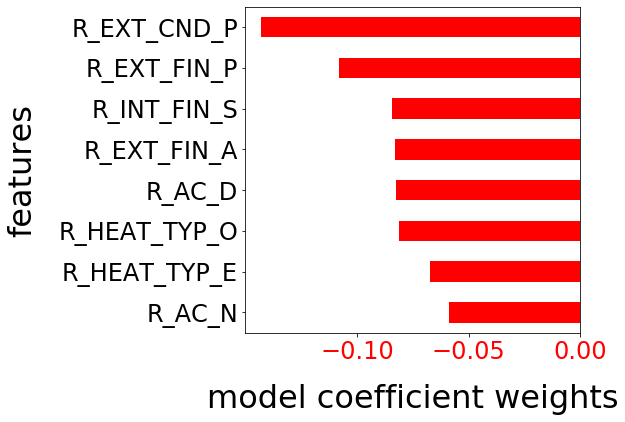

In [84]:
plt.figure(figsize=(6,6))

temper = temper.sort_values(ascending=False)
temper[temper<-0.05].plot.barh(color="red")
plt.xticks(rotation=90)

plt.yticks(size=24)
plt.xlabel("model coefficient weights",size=32,labelpad=20)
plt.ylabel("features",size=32,labelpad=20)

plt.xticks([-0.1,-0.05,0],size=24,rotation=0,color="red")
#plt.xlim(left=-0.5e6,right=0.5e6)
plt.savefig("coef_neg.png",bbox_inches="tight",dpi=300)
plt.show()


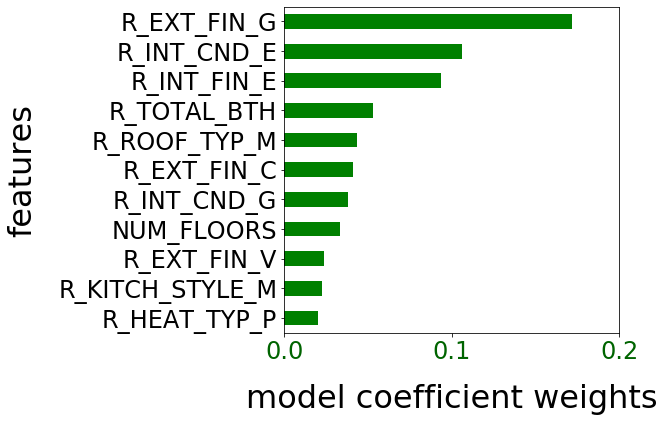

In [85]:
plt.figure(figsize=(6,6))

temper = temper.sort_values(ascending=True)
temper[temper>0.020].plot.barh(color="green")
plt.xticks(rotation=90)

plt.yticks(size=24)
plt.xlabel("model coefficient weights",size=32,labelpad=20)
plt.ylabel("features",size=32,labelpad=20)

plt.xticks([0,0.1,0.2],size=24,rotation=0,color="darkgreen")
#plt.xlim(left=-0.5e6,right=0.5e6)
plt.savefig("coef_pos.png",bbox_inches="tight",dpi=300)
plt.show()

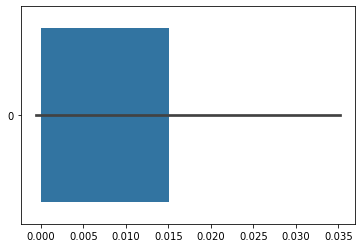

In [86]:
sns.barplot(data=coef_val, orient = 'h')

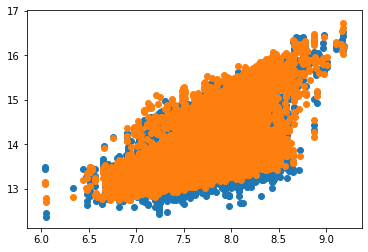

In [87]:
plt.scatter(X_test["LIVING_AREA"],Y_test)
plt.scatter(X_test["LIVING_AREA"],ElasticNetCVModel2.predict(X_test[my_feat]))

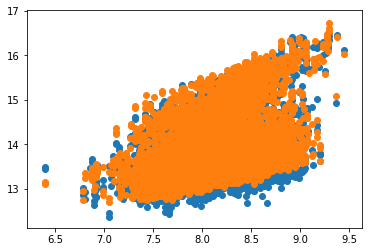

In [88]:
plt.scatter(X_test["GROSS_AREA"],Y_test)
plt.scatter(X_test["GROSS_AREA"],ElasticNetCVModel2.predict(X_test[my_feat]))


In [89]:
df3["Residual"] =  -np.exp(ElasticNetCVModel2.predict(df3[my_feat])) + np.exp(df3["MARKET_VALUE"])
RSS = (df3["Residual"]**2).sum()/len(ndata)
print(np.sqrt(RSS))

341351.05202079576


/home/npatel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


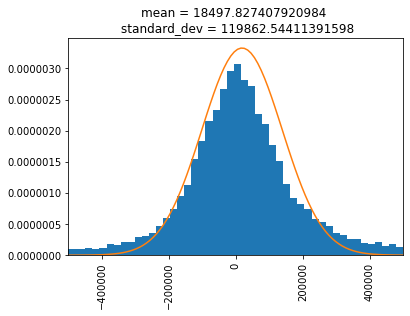

In [90]:
plt.hist(ndata["Residual"],bins=400, normed=True); 
plt.xlim(left=-0.5e6,right=0.5e6)
plt.xticks(rotation=90)

from scipy.stats import norm
xmin=-500000
xmax=500000
sigma_scale=0.34
mean=ndata["Residual"].mean()
std = ndata["Residual"].std()

x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std*sigma_scale)
plt.plot(x, y)
string = "mean = "+str(mean)+" \n standard_dev = "+str(std*sigma_scale); 
plt.title(string)
plt.show()

## Query houses with specific renovations

In [113]:
recommend = df3[(df3["Residual"]<-100000)]
recommend = recommend[(recommend["key"]==2019) & recommend["YR_REMOD"]!=0]
recommend = recommend[recommend["R_EXT_FIN_P"]==1]
print(recommend["FULLADD"])

2231       60 FOWLER ST Boston, MA 2121
2238      23 HOLBORN ST Boston, MA 2121
2353    6 NOTTINGHAM ST Boston, MA 2121
2780     2.0 LEONARD CT Boston, MA 2122
Name: FULLADD, dtype: object


In [115]:
print(recommend.iloc[3],np.exp(recommend.iloc[3]["MARKET_VALUE"]),)

key                                          2019
PID                                    1500054000
ST_NUM                                        2.0
ST_NAME                                   LEONARD
ST_NAME_SUF                                    CT
ZIPCODE                                      2122
OWN_OCC                                         1
AV_BLDG                                    118200
AV_TOTAL                                   187800
GROSS_TAX                                  197941
LAND_SF                                      1280
YR_BUILT                                     1890
YR_REMOD                                     1979
GROSS_AREA                                7.62413
LIVING_AREA                               7.06133
NUM_FLOORS                                      2
R_TOTAL_RMS                                     6
R_BDRMS                                         3
R_FULL_BTH                                      1
R_HALF_BTH                                      0


In [116]:
query = recommend.iloc[3]
np.exp(query["LIVING_AREA"])

1165.9999999999998

In [117]:
#query.at["R_EXT_CND_E"] = 0
#query.at["R_EXT_CND_P"] = 1
np.exp(ElasticNetCVModel2.predict(query[my_feat].values.reshape(1,-1))[0])

525371.0901777522

### Renovation: Asphalt exterior finish to Glass exerior finish

In [136]:
query.at["R_EXT_FIN_G"] = 1
query.at["R_EXT_FIN_P"] = 0

In [137]:
np.exp(ElasticNetCVModel2.predict(query[my_feat].values.reshape(1,-1))[0])

695163.8090641209

In [138]:
recommend = df3[(df3["Residual"]<-200000)]
recommend = recommend[(recommend["key"]==2019)]
recommend = recommend[recommend["R_EXT_FIN_P"]==1]
print(recommend["FULLADD"])

2308    2 OTISFIELD ST Boston, MA 2121
Name: FULLADD, dtype: object


In [139]:
print(recommend.iloc[0],np.exp(recommend.iloc[0]["MARKET_VALUE"]),)

key                                          2019
PID                                    1202751000
ST_NUM                                          2
ST_NAME                                 OTISFIELD
ST_NAME_SUF                                    ST
ZIPCODE                                      2121
OWN_OCC                                         1
AV_BLDG                                    121500
AV_TOTAL                                   218700
GROSS_TAX                                  230510
LAND_SF                                      3242
YR_BUILT                                     1900
YR_REMOD                                        0
GROSS_AREA                                8.36521
LIVING_AREA                               7.93416
NUM_FLOORS                                    2.5
R_TOTAL_RMS                                    11
R_BDRMS                                         6
R_FULL_BTH                                      2
R_HALF_BTH                                      1


In [140]:
#query = recommend.iloc[3]
#np.exp(query["LIVING_AREA"])

In [141]:
np.exp(ElasticNetCVModel2.predict(query[my_feat].values.reshape(1,-1))[0])

695163.8090641209

In [142]:
query.at["R_EXT_FIN_G"] = 1
query.at["R_EXT_FIN_P"] = 0
np.exp(ElasticNetCVModel2.predict(query[my_feat].values.reshape(1,-1))[0])

695163.8090641209

In [143]:
outputdf = pd.DataFrame(columns=["PID","FULLADD","MARKET_VALUE","R_EXT_FIN_P","R_EXP_FIN_E","Profit_wo_Renocost"])
for index, val in recommend.iterrows(): 
    mv = np.exp(val["MARKET_VALUE"]); 
    val.at["R_EXT_FIN_P"]=0; 
    val.at["R_EXT_FIN_E"]=1; 
    newmv19 = np.exp(ElasticNetCVModel2.predict(query[my_feat].values.reshape(1,-1))[0])
    
    val.at["key"]=2020 
    newmv20 = np.exp(ElasticNetCVModel2.predict(query[my_feat].values.reshape(1,-1))[0])
    
    print(mv, newmv19, newmv20, newmv19-mv, newmv20-mv)

415143.08716122137 695163.8090641209 695163.8090641209 280020.7219028995 280020.7219028995


In [126]:
recommend = df3[(df3["key"]==2019)]
recommend = recommend[recommend["R_EXT_FIN_P"]==1]
#print(recommend["FULLADD"])

recommend["MVReno19"] = 0.0; 
recommend["MVReno20"] = 0.0; 
recommend["Prof19"] = 0.0; 
recommend["Prof20"] = 0.0; 
for index, val in recommend.iterrows(): 
    mv = np.exp(val["MARKET_VALUE"]); 
    val.at["R_EXT_FIN_P"]=0; 
    val.at["R_EXT_FIN_G"]=1; 
    newmv19 = np.exp(ElasticNetCVModel2.predict(val[my_feat].values.reshape(1,-1))[0])
    
    val.at["key"]=2020 
    newmv20 = np.exp(ElasticNetCVModel2.predict(val[my_feat].values.reshape(1,-1))[0])
    
    recommend.at[index,"MARKET_VALUE"]=mv
    recommend.at[index,"MVReno19"]=newmv19
    recommend.at[index,"MVReno20"]=newmv20
    recommend.at[index,"Prof19"] = newmv19-mv
    recommend.at[index,"Prof20"] = newmv20-mv
    
recommend = recommend.sort_values(by="Prof19",ascending=False)

In [127]:
interFeat = ["FULLADD","MARKET_VALUE", "MVReno19","MVReno20",'Prof19','Prof20']
print(recommend[interFeat]); 

                                  FULLADD  MARKET_VALUE      MVReno19  \
2308       2 OTISFIELD ST Boston, MA 2121  4.151431e+05  9.308784e+05   
2388       176 RUTHVEN ST Boston, MA 2121  7.722899e+05  1.273211e+06   
1150         3 PULASKI AV Boston, MA 2127  5.418925e+05  9.682890e+05   
2353      6 NOTTINGHAM ST Boston, MA 2121  6.082886e+05  1.025778e+06   
2231         60 FOWLER ST Boston, MA 2121  6.544766e+05  1.071204e+06   
2320        9 WAUMBECK ST Boston, MA 2121  7.943023e+05  1.205132e+06   
2357          29 WABON ST Boston, MA 2121  9.822448e+05  1.375371e+06   
1956        14 WENSLEY ST Boston, MA 2120  1.069440e+06  1.449703e+06   
2782   14.0 LEEDSVILLE ST Boston, MA 2122  7.272626e+05  1.103217e+06   
2681         40 WINTER ST Boston, MA 2122  6.819866e+05  1.057581e+06   
1696        37 LINDSEY ST Boston, MA 2124  8.397735e+05  1.214524e+06   
2780       2.0 LEONARD CT Boston, MA 2122  3.309366e+05  6.951638e+05   
1466   17.0 MT EVERETT ST Boston, MA 2125  5.261363

### Renovating house style to Tudor - most expensive!

In [144]:
BuildStylFeat = ['R_BLDG_STYL_BW', 'R_BLDG_STYL_CL',
        'R_BLDG_STYL_CN', 'R_BLDG_STYL_CP', 'R_BLDG_STYL_CV', 'R_BLDG_STYL_DK',
        'R_BLDG_STYL_DX', 'R_BLDG_STYL_OT', 'R_BLDG_STYL_RE', 'R_BLDG_STYL_RM',
        'R_BLDG_STYL_RN', 'R_BLDG_STYL_RR', 'R_BLDG_STYL_SD', 'R_BLDG_STYL_SL',
        'R_BLDG_STYL_TD', 'R_BLDG_STYL_TF', 'R_BLDG_STYL_TL', 'R_BLDG_STYL_VT']

In [145]:
recommend = df3[(df3["key"]==2019)]
print(len(recommend))
recommend = recommend[(recommend["R_BLDG_STYL_TD"]==0) & (recommend["R_BLDG_STYL_OT"]==0)]
print(len(recommend))
#print(recommend["FULLADD"])

recommend[BuildStylFeat] = 0;
recommend["R_BLDG_STYL_TD"] = 1;
recommend["MARKET_VALUE"] = np.exp(recommend["MARKET_VALUE"]); 
recommend["MVReno19"] = np.exp(ElasticNetCVModel2.predict(recommend[my_feat])); 
recommend["key"] = 2020;
recommend["MVReno20"] = np.exp(ElasticNetCVModel2.predict(recommend[my_feat])); 
recommend["Prof19"] = recommend["MVReno19"] - recommend["MARKET_VALUE"]; 
recommend["Prof20"] = recommend["MVReno20"] - recommend["MARKET_VALUE"]; 

recommend = recommend.sort_values(by="Prof19",ascending=False)

3542
3532


In [146]:
interFeat = ["FULLADD","MARKET_VALUE", "MVReno19","MVReno20",'Prof19','Prof20']
print(recommend[interFeat]); 

                                  FULLADD  MARKET_VALUE      MVReno19  \
30          39 BRIMMER ST Boston, MA 2108  9.461538e+06  1.442501e+07   
89           34 BEACON ST Boston, MA 2108  1.496651e+07  1.984034e+07   
56       100 MT VERNON ST Boston, MA 2108  7.084783e+06  1.048239e+07   
48           60 BEACON ST Boston, MA 2108  1.026668e+07  1.343494e+07   
42           7 BRIMMER ST Boston, MA 2108  6.942107e+06  1.008345e+07   
...                                   ...           ...           ...   
1021  129 COMMONWEALTH AV Boston, MA 2116  1.157875e+07  9.164447e+06   
1027    59 MARLBOROUGH ST Boston, MA 2116  6.742828e+06  4.195319e+06   
1085   390 MARLBOROUGH ST Boston, MA 2115  8.363997e+06  5.622433e+06   
986    113 MARLBOROUGH ST Boston, MA 2116  9.042281e+06  6.260746e+06   
1016          7 EXETER ST Boston, MA 2116  8.686188e+06  5.752396e+06   

          MVReno20        Prof19        Prof20  
30    1.450538e+07  4.963476e+06  5.043847e+06  
89    1.995089e+07  4.873

In [147]:
len(my_feat)

106

### Renovation: Interior condition (anything) to excellent 

In [152]:
BuildStylFeat = ['R_INT_CND_A', 'R_INT_CND_E', 'R_INT_CND_F','R_INT_CND_G', 'R_INT_CND_P']

In [153]:
recommend = df3[(df3["key"]==2019) & (df3["Residual"]<-100000)]
print(len(recommend))
recommend = recommend[(recommend["R_INT_CND_E"]!=1)]
print(len(recommend))
#print(recommend["FULLADD"])

recommend[BuildStylFeat] = 0;
recommend["R_INT_CND_E"] = 1;
recommend["MARKET_VALUE"] = np.exp(recommend["MARKET_VALUE"]); 
recommend["MVReno19"] = np.exp(ElasticNetCVModel2.predict(recommend[my_feat])); 
recommend["key"] = 2020;
recommend["MVReno20"] = np.exp(ElasticNetCVModel2.predict(recommend[my_feat])); 
recommend["Prof19"] = recommend["MVReno19"] - recommend["MARKET_VALUE"]; 
recommend["Prof20"] = recommend["MVReno20"] - recommend["MARKET_VALUE"]; 

recommend = recommend.sort_values(by="Prof19",ascending=False)

874
826


In [154]:
interFeat = ["FULLADD","MARKET_VALUE", "MVReno19","MVReno20",'Prof19','Prof20']
recommend = recommend[recommend["Prof19"]<1e6]
print(recommend[interFeat]);

                                 FULLADD  MARKET_VALUE      MVReno19  \
784      47 WORCESTER ST Boston, MA 2118  2.231346e+06  3.227208e+06   
927   30 S HUNTINGTON AV Boston, MA 2116  1.796528e+06  2.787163e+06   
1120   834 HUNTINGTON AV Boston, MA 2115  1.443195e+06  2.431687e+06   
1097     216 HEMENWAY ST Boston, MA 2115  1.681021e+06  2.653605e+06   
26        69 CHESTNUT ST Boston, MA 2108  4.555134e+06  5.527306e+06   
...                                  ...           ...           ...   
2602       30.0 ALWIN ST Boston, MA 2136  4.258411e+05  5.920924e+05   
190         75 CONDOR ST Boston, MA 2128  6.112722e+05  7.707756e+05   
2238       23 HOLBORN ST Boston, MA 2121  7.036108e+05  8.609768e+05   
2221      42 HARTWELL ST Boston, MA 2121  5.410956e+05  6.884510e+05   
2943      30 STARBIRD AV Boston, MA 2131  4.866902e+05  6.327546e+05   

          MVReno20         Prof19        Prof20  
784   3.245189e+06  995862.109452  1.013843e+06  
927   2.802692e+06  990635.146429  